# Tests of the event rejection (ER) algorithm for four-jet event selections

In [2]:
from h5py import File
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm
import random
import itertools as it
import time
import joblib

In [3]:
#Opening the HDF5 File
input_file = "../output.h5"
#input_file = "../data22_13p6TeV.00440499.physics_EnhancedBias.h5"
#input_file = "../EBdata.h5"
#input_file = "../hh4b.h5"
#input_file = "../jz0.h5"
#input_file = "../jz1.h5"
#input_file = "../jz2.h5"
#input_file = "../jz3.h5"
#input_file = "../jz4.h5"
#input_file = "../jz5.h5"

data = File(input_file, 'r')
print("List of available datasets: " + str(list(data.keys())))

List of available datasets: ['jets', 'super_tracks']


In [4]:
#Accessing the 'Jets' Dataset
jets = data['jets']
print("The attributes of each element of the dataset (jets): " + str(jets.dtype.fields.keys()))
print("The shape of the dataset is: " + str(jets.shape))

The attributes of each element of the dataset (jets): dict_keys(['pt', 'eta', 'dipz20230223_z', 'dipz20230223_negLogSigma2', 'fastDips_pb', 'fastDips_pc', 'fastDips_pu', 'fastGN120230327_pb', 'fastGN120230327_pc', 'fastGN120230327_pu', 'HadronConeExclTruthLabelID', 'HadronConeExclExtendedTruthLabelID', 'jetPtRank', 'n_super_tracks', 'mcEventWeight', 'eventNumber', 'averageInteractionsPerCrossing', 'actualInteractionsPerCrossing', 'nPrimaryVertices', 'primaryVertexBeamspotZ', 'primaryVertexDetectorZUncertainty'])
The shape of the dataset is: (167,)


In [5]:
print("The number of jets in the sample is: " + str(len(jets)))
print("The number of jets in the sample with pT < 20 GeV is: " + str(len(jets[jets["pt"] < 20])))
print("The number of jets in the sample with eta > 2.5 GeV is: " + str(len(jets[jets["eta"] > 2.5])))

The number of jets in the sample is: 167
The number of jets in the sample with pT < 20 GeV is: 0
The number of jets in the sample with eta > 2.5 GeV is: 0


In [6]:
#Getting the events in our sample
uniques = np.unique(jets["eventNumber"])
print("The number of events in our sample is: " + str(len(uniques)))
print("The events_ID array looks like: " + str(uniques))

The number of events in our sample is: 78
The events_ID array looks like: [25000003 25000004 25000005 25000007 25000009 25000010 25000011 25000013
 25000014 25000015 25000016 25000018 25000023 25000024 25000025 25000026
 25000027 25000028 25000030 25000031 25000032 25000034 25000035 25000036
 25000037 25000038 25000039 25000040 25000044 25000045 25000046 25000047
 25000048 25000049 25000051 25000052 25000053 25000054 25000055 25000056
 25000057 25000058 25000059 25000060 25000061 25000062 25000063 25000064
 25000065 25000066 25000068 25000069 25000070 25000071 25000072 25000073
 25000075 25000076 25000077 25000078 25000083 25000084 25000085 25000086
 25000087 25000088 25000090 25000091 25000092 25000093 25000096 25000097
 25000098 25000099 25000102 25000105 25000106 25000108]


In [7]:
%%time
# Getting an array of the jet multiplicities in the sample
jet_multiplicities = []
for i in uniques:
    jet_multiplicities.append(len(jets[jets["eventNumber"] == i]))

CPU times: user 25.5 ms, sys: 0 ns, total: 25.5 ms
Wall time: 35.8 ms


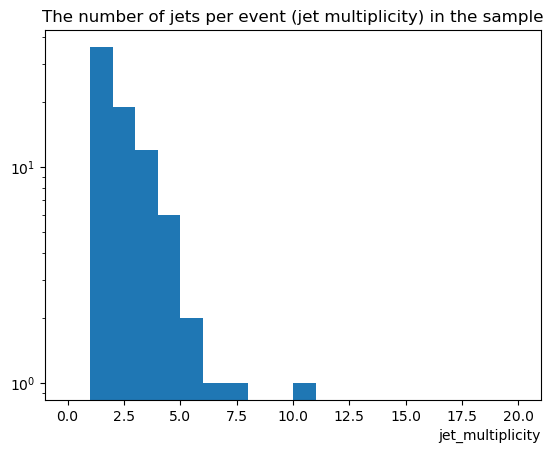

In [8]:
# Plotting the jet multiplicities in the sample
plt.hist(jet_multiplicities, bins = 20, range=(0,20))
plt.yscale('log')
plt.xlabel("jet_multiplicity", loc='right')
plt.title('The number of jets per event (jet multiplicity) in the sample')
plt.show()

In [9]:
%%time
# Getting an array of the leading jet pT's per event in the sample
leading_pT = []
for i in uniques:
    pTs = []
    event_jets = jets[jets["eventNumber"] == i]
    for jet in event_jets:
        pTs.append(jet['pt'])
    leading_pT.append(max(pTs))

CPU times: user 17.2 ms, sys: 4.3 ms, total: 21.5 ms
Wall time: 21.8 ms


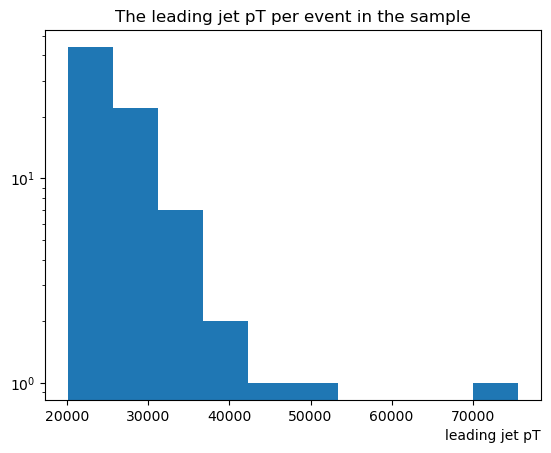

In [10]:
# Plotting the leading jet pT's per event in the sample
plt.hist(leading_pT, bins = 10)
plt.yscale('log')
plt.xlabel("leading jet pT", loc='right')
plt.title('The leading jet pT per event in the sample')
plt.show()

In [11]:
%%time
# Getting an array of the sub-leading jet pT's per event in the sample
subleading_pT = []
for i in uniques:
    pTs = []
    event_jets = jets[jets["eventNumber"] == i]
    for jet in event_jets:
        pTs.append(jet["pt"])
    if len(pTs) > 1: 
        subleading_pT.append(sorted(pTs)[-2])

CPU times: user 15.7 ms, sys: 5.87 ms, total: 21.6 ms
Wall time: 22.5 ms


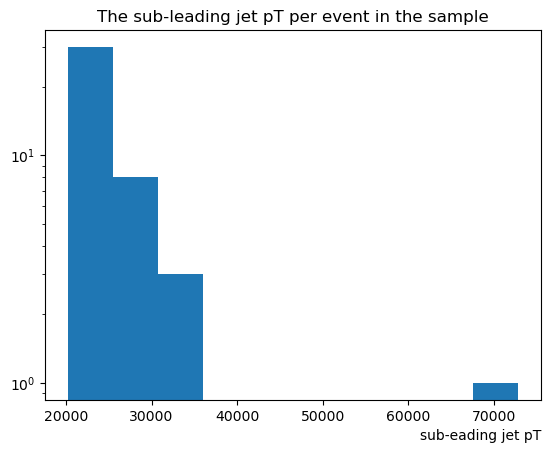

In [12]:
# Plotting the sub-leading jet pT's per event in the sample
plt.hist(subleading_pT, bins = 10)
plt.yscale('log')
plt.xlabel("sub-eading jet pT", loc='right')
plt.title('The sub-leading jet pT per event in the sample')
plt.show()

In [19]:
%%time

#Filtering the four-or-more jet events
fom_events = []
counter = 0



for id in uniques:
    if len(jets[jets["eventNumber"] == id]) >= 4:
        fom_events.append(id)
        counter +=1
    #if counter == 1000:
        #break
"""
for id in uniques:
    event_jets = jets[jets["eventNumber"] == id]
    bjets = event_jets[event_jets["HadronConeExclTruthLabelID"] == 5]
    if len(event_jets) >= 4 & len(bjets) >= 4:
        fom_events.append(id)
        counter +=1
    if counter == 100:
        break
"""
print("The number of events that have four or more (fom) selected jets is: " + str(len(fom_events)))

The number of events that have four or more (fom) selected jets is: 11
CPU times: user 20.9 ms, sys: 0 ns, total: 20.9 ms
Wall time: 22.7 ms


In [20]:
# A function that takes in the event number and calculates the maximum over 4-jet combinations of log of the product of the 
# likelihood functions of all the jets in the event NUMERICALLY

def get_max_log_likelihood_num(event_id,jets):
    event_jets = jets[jets["eventNumber"] == event_id]
    #num_jets = len(event_jets)
    z = np.arange(-5*50, 5*50, 0.1)

    combinations = []
    mlpl_array = []

    for combination in it.combinations(event_jets, 4):
        combinations.append(combination)

    for comb in combinations:
        log_total_likelihood = -4 * np.log(np.sqrt(2*np.pi))
            
        for jet in comb:
            mu = jet["dipz20230223_z"] * 50
            sigma = np.exp(-0.5*jet["dipz20230223_negLogSigma2"]) *50
            #likelihood = (2*np.pi)**(-1/2) * (sigma)**(-1) * np.exp( -1 * (z - mu)**2 * (2 * sigma^2)**(-1) )
            log_total_likelihood -= ( np.log(sigma) + (z - mu)**2 * (2 * sigma**(2))**(-1) )
    
        mlpl_array.append(max(log_total_likelihood))
            
    
    max_log_likelihood = max(mlpl_array)
        
    return max_log_likelihood

In [21]:
# A function that takes in the event number and calculates the maximum over 4-jet combinations of log of the product of the 
# likelihood functions of all the jets in the event ANALYTICALLY

def get_max_log_likelihood_an(event_id,jets,comb_num,num_highest_pt=555555):
    event_jets = jets[jets["eventNumber"] == event_id]
    
    if num_highest_pt != 555555:
        if len(event_jets) > num_highest_pt:
            event_jets = event_jets[(-event_jets['pt']).argsort()[:num_highest_pt]]
    
    combinations = []
    mlpl_array = []

    for combination in it.combinations(event_jets, comb_num):
        combinations.append(combination)

    for comb in combinations:
        num = 0
        denom = 0
        second_term = 0
        third_term = 0
        for jet in comb:
            mu = jet["dipz20230223_z"] * 50
            sigma = np.exp(-0.5*jet["dipz20230223_negLogSigma2"]) * 50

            num += (mu) / (sigma**2)
            denom += 1 / (sigma**2)
            second_term -= np.log(sigma)
        for jet in comb:
            mu = jet["dipz20230223_z"] * 50
            sigma = np.exp(-0.5*jet["dipz20230223_negLogSigma2"]) * 50

            third_term -= ((num / denom) - mu)**2 / (2*sigma**2) 
            
        mlpl_array.append(-4 * np.log(np.sqrt(2*np.pi)) + second_term + third_term)
            
    
    max_log_likelihood = max(mlpl_array)
        
    return max_log_likelihood


In [22]:
# A function that takes in the event number and calculates the maximum over 4-jet combinations of log of the product of the 
# likelihood functions of all the jets in the event ANALYTICALLY

def get_max_log_likelihood_an_hh4b(event_id,jets,comb_num,num_highest_pt=555555):
    event_jets = jets[jets["eventNumber"] == event_id]

    if num_highest_pt != 555555:
        if len(event_jets) > num_highest_pt:
            event_jets = event_jets[(-event_jets['pt']).argsort()[:num_highest_pt]]
    
    combinations = []

    for combination in it.combinations(event_jets, comb_num):
        combinations.append(combination)

    mlpl = -999999999999
    highest_comb = np.empty

    for comb in combinations:
        num = 0
        denom = 0
        second_term = 0
        third_term = 0
        for jet in comb:
            mu = jet["dipz20230223_z"] * 50
            sigma = np.exp(-0.5*jet["dipz20230223_negLogSigma2"]) * 50

            num += (mu) / (sigma**2)
            denom += 1 / (sigma**2)
            second_term -= np.log(sigma)
        for jet in comb:
            mu = jet["dipz20230223_z"] * 50
            sigma = np.exp(-0.5*jet["dipz20230223_negLogSigma2"]) * 50

            third_term -= ((num / denom) - mu)**2 / (2*sigma**2) 
            
        if -4 * np.log(np.sqrt(2*np.pi)) + second_term + third_term > mlpl:
            mlpl = -4 * np.log(np.sqrt(2*np.pi)) + second_term + third_term
            highest_comb = comb
            
    num_bjets_chosen = 0
    for jet in highest_comb:
       if jet['HadronConeExclTruthLabelID'] == 5:
           num_bjets_chosen += 1
    
    max_log_likelihood = mlpl
    
    return max_log_likelihood, num_bjets_chosen

In [23]:
len(jets[jets["eventNumber"] == fom_events[0]])

5

In [24]:
%%time
get_max_log_likelihood_an_hh4b(fom_events[3],jets,4)

CPU times: user 1.01 ms, sys: 469 µs, total: 1.48 ms
Wall time: 15.5 ms


(-34.72567846324857, 0)

In [25]:
%%time
get_max_log_likelihood_an_hh4b(fom_events[3],jets,3)

CPU times: user 1.12 ms, sys: 0 ns, total: 1.12 ms
Wall time: 1.13 ms


(-11.255972193229445, 0)

In [26]:
%%time
get_max_log_likelihood_an_hh4b(fom_events[3],jets,3,5)

CPU times: user 1.12 ms, sys: 0 ns, total: 1.12 ms
Wall time: 1.13 ms


(-11.255972193229445, 0)

In [27]:
%%time
get_max_log_likelihood_an_hh4b(fom_events[3],jets,2)

CPU times: user 768 µs, sys: 356 µs, total: 1.12 ms
Wall time: 1.13 ms


(-8.15163922618085, 0)

In [28]:
def get_max_log_likelihood_dist(string, num=999999999999999):
    start = time.time()
    data = File(string, 'r')
    jets = data['jets']
    uniques = np.unique(jets["eventNumber"])
    
    print("The number of jets in the sample is: " + str(len(jets)))
    print("The number of jets in the sample with pT < 20 GeV is: " + str(len(jets[jets["pt"] < 20])))
    print("The number of jets in the sample with eta > 2.5 GeV is: " + str(len(jets[jets["eta"] > 2.5])))
    print("The number of events in our sample is: " + str(len(uniques)))
    
    max_log_likelihood_list = []
    no_of_processed_events = num
    counter = 0

    for id in uniques:
        if len(jets[jets["eventNumber"] == id]) >= 4:
            max_log_likelihood_list.append(get_max_log_likelihood_an(id,jets))
            counter +=1
        if counter == no_of_processed_events:
            break

    if counter == no_of_processed_events:
        print("The provided number of four or more jet events in the sample was run over and it is: " + str(num))
    if counter != no_of_processed_events:
        print("The number of four or more jet events in the sample is: " + str(counter))
        print("The number of four or more jet events in the sample is less than the provided number, therefore all the sample was run over.")
    end = time.time()
    print("The time of execution of the (get_max_log_likelihood_dist) function is :", ((end-start) / 60) , "min")

    return max_log_likelihood_list

def plot_distribution(max_log_likelihood_list):
    plt.hist(max_log_likelihood_list, bins = 500)
    plt.yscale("log")
    plt.xlabel("MLPL", loc='right')
    plt.title('Distribution of the discriminant variable (MLPL)')
    plt.show()

In [ ]:
test_dist = get_max_log_likelihood_dist(input_file, 4, 5, 5)
plot_distribution(test_dist)
joblib.dump(test_dist, 'test_dist.sav')

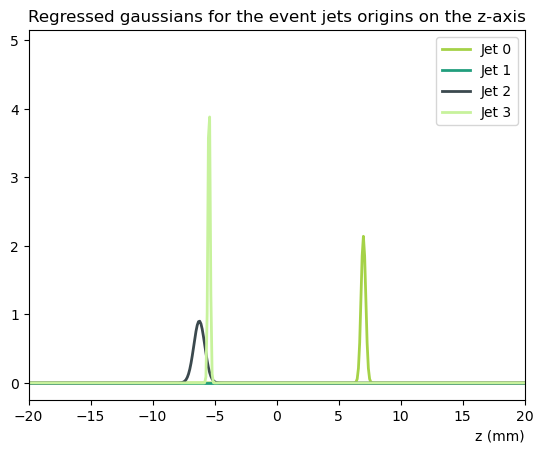

MLLP for this event is: -34.72567846324857


In [31]:
# Visualizing the jets in one event
index = 3

event_id = fom_events[index]
event_jets = jets[jets["eventNumber"] == event_id]
num_jets = len(event_jets)

#Generating random colors for  the plot
color=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])
           for j in range(num_jets)]
ic = 0      #color counter
x = np.arange(-4*50, 4*50, 0.1)

for i in range(num_jets):
    #plt.plot(x, norm.pdf(x, event_jets[i]["dipz20230223_z"], np.exp(-0.5*event_jets[i]["dipz20230223_negLogSigma2"])), color=color[ic], linewidth=2, label='Jet '+str(ic))
    plt.plot(x, norm.pdf(x, event_jets[i]["dipz20230223_z"]*50, np.exp(-0.5*event_jets[i]["dipz20230223_negLogSigma2"])), color=color[ic], linewidth=2, label='Jet '+str(ic))
    ic = ic + 1    
plt.xlabel("z (mm)", loc='right')
plt.title('Regressed gaussians for the event jets origins on the z-axis')
plt.xlim([-2*10, 2*10])
plt.legend()
plt.show()
#plt.cla()

print("MLLP for this event is: " + str(get_max_log_likelihood_an(fom_events[index],jets, 4)))

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# Trial and Error

In [13]:
def get_max_log_likelihood_an_hh4b(event_id,jets,comb_num,num_highest_pt=555555):
    event_jets = jets[jets["eventNumber"] == event_id]

    if num_highest_pt != 555555:
        if len(event_jets) > num_highest_pt:
            event_jets = event_jets[(-event_jets['pt']).argsort()[:num_highest_pt]]
    
    combinations = []

    for combination in it.combinations(event_jets, comb_num):
        combinations.append(combination)

    mlpl = -999999999999
    num_bjets_chosen = 0

    for comb in combinations:
        num = 0
        denom = 0
        second_term = 0
        third_term = 0
        num_bjets = 0 
        for jet in comb:
            mu = jet["dipz20230223_z"] * 50
            sigma = np.exp(-0.5*jet["dipz20230223_negLogSigma2"]) * 50

            num += (mu) / (sigma**2)
            denom += 1 / (sigma**2)
            second_term -= np.log(sigma)
            
        for jet in comb:
            mu = jet["dipz20230223_z"] * 50
            sigma = np.exp(-0.5*jet["dipz20230223_negLogSigma2"]) * 50

            third_term -= ((num / denom) - mu)**2 / (2*sigma**2)

            if jet['HadronConeExclTruthLabelID'] == 5:
               num_bjets += 1
    
        if -4 * np.log(np.sqrt(2*np.pi)) + second_term + third_term > mlpl:
            mlpl = -4 * np.log(np.sqrt(2*np.pi)) + second_term + third_term
            num_bjets_chosen = num_bjets
    
    max_log_likelihood = mlpl
    
    return max_log_likelihood, num_bjets_chosen


In [26]:
%%time 
get_max_log_likelihood_an_hh4b(fom_events[11],jets,4)

CPU times: user 87.8 ms, sys: 228 µs, total: 88 ms
Wall time: 86.5 ms


(-7.12269756221824, 4)

In [27]:
%%time 
get_max_log_likelihood_an(fom_events[11],jets,4)

CPU times: user 84.5 ms, sys: 3.79 ms, total: 88.3 ms
Wall time: 86.9 ms


-7.12269756221824

In [32]:
def get_leading_pt_dist(string, max_num=200):
    data = File(string, 'r')
    jets = data['jets']
    uniques = np.unique(jets["eventNumber"])
        
    counter = 0
    leading_pT = []
    
    for i in uniques:
        pTs = []
        event_jets = jets[jets["eventNumber"] == i]
        for jet in event_jets:
            pTs.append(jet["pt"])
        leading_pT.append(max(pTs))
        counter += 1
        if counter == max_num:
            break 
    return leading_pT

In [33]:
leading_pT_jz0 = get_leading_pt_dist('../jz0.h5')
leading_pT_jz1 = get_leading_pt_dist('../jz1.h5')
leading_pT_jz2 = get_leading_pt_dist('../jz2.h5')
leading_pT_jz3 = get_leading_pt_dist('../jz3.h5')
leading_pT_jz4 = get_leading_pt_dist('../jz4.h5')
leading_pT_jz5 = get_leading_pt_dist('../jz5.h5')

In [34]:
weights_jz0 = np.full_like(leading_pT_jz0,0.7651165653000001)
weights_jz1 = np.full_like(leading_pT_jz1,0.0032993956809600007)
weights_jz2 = np.full_like(leading_pT_jz2,2.6009622717000003e-05)
weights_jz3 = np.full_like(leading_pT_jz3,3.3590422200000005e-07)
weights_jz4 = np.full_like(leading_pT_jz4,3.8673973868e-09)
weights_jz5 = np.full_like(leading_pT_jz5,7.7799492096e-11)

In [40]:
leading_pT_jz0_hist, jz0_bin_edges = np.histogram(leading_pT_jz0, weights=weights_jz0, bins = 1000, range = (0, 100000))
leading_pT_jz1_hist, jz1_bin_edges = np.histogram(leading_pT_jz1, weights=weights_jz1, bins = 1000, range = (0, 100000))
leading_pT_jz2_hist, jz2_bin_edges = np.histogram(leading_pT_jz2, weights=weights_jz2, bins = 1000, range = (0, 100000))
leading_pT_jz3_hist, jz3_bin_edges = np.histogram(leading_pT_jz3, weights=weights_jz3, bins = 1000, range = (0, 100000))
leading_pT_jz4_hist, jz4_bin_edges = np.histogram(leading_pT_jz4, weights=weights_jz4, bins = 1000, range = (0, 100000))
leading_pT_jz5_hist, jz5_bin_edges = np.histogram(leading_pT_jz5, weights=weights_jz5, bins = 1000, range = (0, 100000))

In [64]:
leading_pT_total_hist = leading_pT_jz0_hist + leading_pT_jz1_hist + leading_pT_jz2_hist + leading_pT_jz3_hist + leading_pT_jz4_hist + leading_pT_jz5_hist

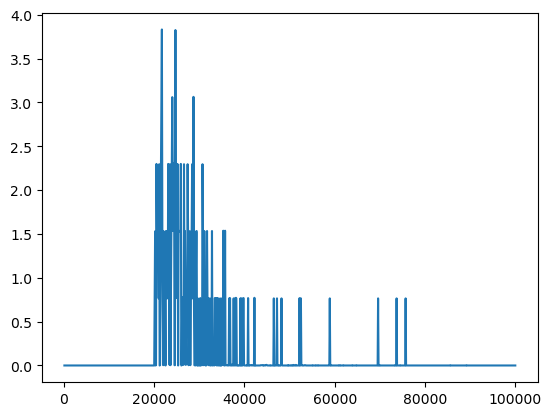

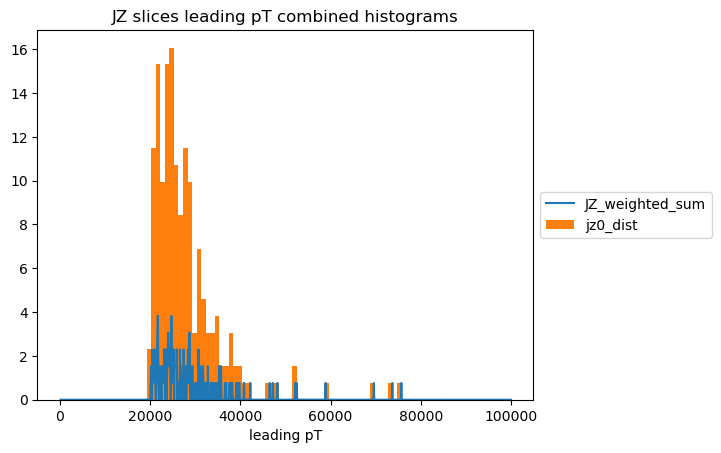

In [68]:
"""JZ slices leading pT combined histograms"""
bins = np.linspace(0, 100000, 100)

plt.plot(jz0_bin_edges[1:],leading_pT_total_hist, alpha=1, label='JZ_weighted_sum')
plt.hist(leading_pT_jz0, bins, weights=weights_jz0, alpha=1, label='jz0_dist', histtype='stepfilled')
#plt.hist(leading_pT_jz1, bins, weights=weights_jz1, alpha=0.5, label='jz1_dist', histtype='step')
#plt.hist(leading_pT_jz2, bins, weights=weights_jz2, alpha=0.4, label='jz2_dist', histtype='step')
#plt.hist(leading_pT_jz3, bins, weights=weights_jz3, alpha=0.3, label='jz3_dist', histtype='step')
#plt.hist(leading_pT_jz4, bins, weights=weights_jz4, alpha=0.2, label='jz4_dist', histtype='step')
#plt.hist(leading_pT_jz5, bins, weights=weights_jz5, alpha=0.5, label='jz5_dist', histtype='step')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("JZ slices leading pT combined histograms")
plt.xlabel("leading pT")
plt.show()